# PyTorch

In [1]:
pip install torch torchvision matplotlib numpy

  Using cached torch-2.7.1-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
Using cached torch-2.7.1-cp313-cp313-win_amd64.whl (216.1 MB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 13.7 MB/s eta 0:00:00
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.5.1-py3-none-

![Alt text](Images/Fashion1.png)

![Alt text](Images/GreyScaleShape.png)
![Alt text](Images/Colour.png)

## Notes: 

10 000 = Test

60 000 = Training

Balanced = equal categories of clothes

1. Data comes in as images, grey scale, therefore each image has a value between 0-255
2. Then we tensorfie it and scale it between [0,1] (Say a pixel has a grey scale value of 100 then we do 100/255 = 0.39)
3. Then we normalise it [(x (pix val) - meu (mean)) / std ] -> mapped to [-1,1]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# Full Transform

In [16]:
# Transformation: Convert to tensor + normalize
transform = transforms.Compose([ # Transform Pipeline
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # FashionMNIST is grayscale
])

# Download train & test sets
train_dataset_full = torchvision.datasets.FashionMNIST(
    root='./data', # Store the data in this folder in the roor folder
    train=True,  # Grab training data
    download=True, # Download it
    transform=transform # Applies the transofrm pipeline
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)

img, label = train_dataset_full[3]
display(img)
display(label)

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.7412, -0.2471,  0.3725,  0.2235, -0.4980, -0.8902,
          -0.5765,  0.0745,  0.6000,  0.5216, -0.2000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.4275,
           0.4588,  0.3882,  0.4353,  0.3725,  0.4745,  0.8196,  1.0000,
           0.7490,  0.7176,  0.5216,  0.4039,  0.4588,  0.6706,  0.1451,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7255,  0.2784,
           0.0980,  0.1765,  0.1922,  0.1765,  0.1451,  0.3725,  0.3725,
           0.3569,  0.3412,  0.2235,  0.1922,  0.1608,  0.0118,  0.2235,
           0.0980, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.1765,  0.1137,
           0.0980,  0.1922,  0.2549,  0.2235,  0

3

# --Only Tensorfie

In [12]:
transform_tensor_only = transforms.Compose([ # Transform Pipeline
    transforms.ToTensor(),
      # FashionMNIST is grayscale
])

train_dataset_full_tensor = torchvision.datasets.FashionMNIST(
    root='./data3', # Store the data in this folder in the roor folder
    train=True,  # Grab training data
    download=True, # Download it
    transform=transform_tensor_only # Applies the transofrm pipeline
)

img, label = train_dataset_full_tensor[3]
display(img)
display(label)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.56MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 166kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.42MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.72MB/s]


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.1294, 0.3765, 0.6863, 0.6118, 0.2510, 0.0549, 0.2118, 0.5373,
          0.8000, 0.7608, 0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2863, 0.7294,
          0.6941, 0.7176, 0.6863, 0.7373, 0.9098, 1.0000, 0.8745, 0.8588,
          0.7608, 0.7020, 0.7294, 0.8353, 0.5725, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.6392, 0.5490,
          0.5882, 0.5961, 0.5882, 0.5725, 0.6863, 0.6863, 0.6784, 0.6706,
          0.6118, 0.5961, 0.5804, 0.5059, 0.6118, 0.5490, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5882, 0.5569, 0.5490,
          0.5961, 0.6275, 0.6118, 0.5725, 0.5569, 0.4980, 0.5294, 0.5216,
          0.5490, 0.5490, 0.5373, 0.5216, 0.4902, 0.6627,

3

# -- Raw Data

In [ ]:
train_dataset_full_raw = torchvision.datasets.FashionMNIST(
    root='./data2', # Store the data in this folder in the roor folder
    train=True,  # Grab training data
    download=True, # Download it
    transform=None # Applies the transofrm pipeline
)

img, label = train_dataset_full_raw[3]
display(img)
display(label)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.06MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 172kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.77MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.0MB/s]


3

# Denormalise and show a batch example

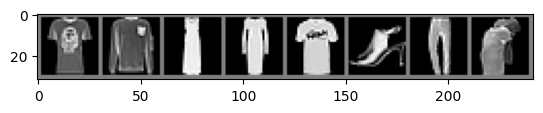

Labels: [0, 2, 3, 3, 0, 5, 1, 0]


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # denormalize
    npimg = img.numpy() # Convert thepytorch tensor back to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Need to transpose to get (C,H,W) into (H,W,C)[what imshow expects] - put index 1 first, then index 2, then index 0 - 
    plt.show()

# Load a few examples
sample_loader = torch.utils.data.DataLoader(train_dataset_full, batch_size=8, shuffle=True)
dataiter = iter(sample_loader)
images, labels = next(dataiter)

# Display them
imshow(torchvision.utils.make_grid(images))
print("Labels:", labels.tolist())


---
# Split labeled and unlabeled

In [ ]:
from collections import defaultdict
import random
from torch.utils.data import Subset # allows you to create a new dataset from selected indices of an existing one

# Split 1000 labeled examples (100 per class)
def split_labeled_unlabeled(dataset, num_labels_per_class=100):
    labels_per_class = defaultdict(list) # If I try to access a key that doesn’t exist yet, automatically create an empty list ([]) for me, so I can append to it right away. Add this feature to this list
    for idx, (_, label) in enumerate(dataset): # Grab the index, ignore the actual image, grab the label
        if len(labels_per_class[label]) < num_labels_per_class: # Do this if the length of this list is smaller than 100, and the list will have 100 labels per class (aka key aka clothing type)
            # labels_per_class = [Class 0 (shirts): (appear at indices) 0,3,5,7...100
            #                     Class 1 (pants): (appear at indices) 1,2,10,14...100]
            labels_per_class[label].append(idx)

    labeled_indices = []
    for indices in labels_per_class.values():
        labeled_indices.extend(indices)

    unlabeled_indices = list(set(range(len(dataset))) - set(labeled_indices)) # Need to use sets subtraction feature, hence convert both to sets, so it will find index x and remove it from the unlabled
    return labeled_indices, unlabeled_indices

labeled_idx, unlabeled_idx = split_labeled_unlabeled(train_dataset_full)

# Create subsets
labeled_dataset = Subset(train_dataset_full, labeled_idx)
unlabeled_dataset = Subset(train_dataset_full, unlabeled_idx)

print(f"Labeled samples: {len(labeled_dataset)}")
print(f"Unlabeled samples: {len(unlabeled_dataset)}")


Labeled samples: 1000
Unlabeled samples: 59000


### Batches are super NB in deep learning

🔁 Why use batches?
✅ Efficiency: GPUs work better with groups of data.

✅ Stability: Gradients are averaged over a batch, making training smoother.

✅ Speed: Training on 64 images in parallel is much faster than 1 at a time.


In [18]:
from torch.utils.data import DataLoader # Takes in a dataset and hands you data in chunks (batches) during training.

batch_size = 64 # train using 64 examples at a time (instead of 1 by 1). This speeds up training and improves stability (gradient updates are averaged over the batch).

# shuffle=True: randomly reshuffles the order each epoch (good for training)
labeled_loader = DataLoader(labeled_dataset, batch_size=batch_size, shuffle=True) 
unlabeled_loader = DataLoader(unlabeled_dataset, batch_size=batch_size, shuffle=True)
# shuffle=False because you want deterministic evaluation
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


---
# Create CNN

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10): # initiating the number of classes, categories
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential( # ()groups the node layers like in a pipeline - create the NN - handles feature extraction
            nn.Conv2d(1, 32, kernel_size=3, padding=1), # (1 image (kernel), feature maps/kernels/filters, 3x3 filter,final size stays same ie 28x28)  | (64,1,28,28) -> (64,32,28,28) | Applies 32 filters/kernels each 3x3 on image - each one detects features (edges) 
            nn.ReLU(), # Allows network to learn complex patterns, curves etc, otherwise it would only be able to learn lines, introduces non linearity. Just replaces neg with 0 | (64,32,28,28)
            nn.MaxPool2d(2, 2),  # (64,32,28,28) → (64,32,14,14) Similar to convo but this looks at blocks and pick the max value (most important value) reducing size and compute cost but keeping important details like strong edges (keep strong activations)

            # Another Conv, Relu , pool block
            # Pick up patterns of patterns, this can detect shoes where the first layer picked up lines
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # (64,32,14,14) → (64,64,14,14) | find more features | the number of input channels (images) 32 must match the out put of the previous
            nn.ReLU(), # Only passes useful signals forward | replaces negs with 0
            nn.MaxPool2d(2, 2)   # (64,64,14,14)  → (64,64,7,7) 
        )
        # You must flatten the output of the conv layers before feeding into linear layers
        self.classifier = nn.Sequential( # Handles the classification
            nn.Linear(64 * 7 * 7, 128), #  (64,3136)  -> (64,128) - > Takes the 3136-dimensional feature vector and maps it to 128 neurons | combines all features to form a dense representation of the image
            nn.ReLU(), # (64,128) -> (64,128) | adds non-linearity so that this fully connected layer can learn more expressive patterns
            nn.Linear(128, num_classes) # (64,128) -> (64,10) | Final layer: outputs a score (logit) for each of the 10 classes. 
        )

    def forward(self, x):  # x = (64,1,28,28) (batches, channels [1 = grey scale],H,W)
        x = self.features(x) # After have (64,1,28,28) -> (64,64,7,7) - (batch,channel,height,width)
        x = x.view(x.size(0), -1)  # Flatten  (64,64,7,7)  -> (64,3136) [64 x 7 x 7 = 3136]
        x = self.classifier(x) # (64,3136) -> (64,10) -> Have 64 images in the batch with an associated score, 10 posible scores (one for each class) (they are not probabilities yet - possibly use softmax to make them probs) | 64 rows, say a row looks like  [0.3,-0.4,...,1.3] -> softmax -> [20%,2%,...,40%]
        return x


## ⚙️ Instantiate Model, Loss, Optimizer

In [ ]:
model = SimpleCNN().to(device) # Puts model on the CPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # optimizer, which is the algorithm that updates the model’s weights during training | gives the optimizer access to all the weights and biases of your network.


## 🧪 Summary Check

In [ ]:
pip install torchsummary

In [ ]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))